# INTRODUCTION

I am using Kaggle's Default of Credit Card Clients Dataset as an exercise for default prediction methods. Any comments and suggestions are more than welcome.

## Data information

Following information from Keggle:

> This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Monetary and payment values are in New Taiwanease dollars. As of 2024, $1 EUR \approx 35 NTD$.

There are 25 variables in the dataset:

- **ID:** ID of each client
- **LIMIT_BAL:** Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- **SEX:** Gender (1=male, 2=female)
- **EDUCATION:** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- **MARRIAGE:** Marital status (1=married, 2=single, 3=others)
- **AGE:** Age in years
- **PAY_0:** Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- **PAY_2:** Repayment status in August, 2005 (scale same as above)
- **PAY_3:** Repayment status in July, 2005 (scale same as above)
- **PAY_4:** Repayment status in June, 2005 (scale same as above)
- **PAY_5:** Repayment status in May, 2005 (scale same as above)
- **PAY_6:** Repayment status in April, 2005 (scale same as above)
- **BILL_AMT1:** Amount of bill statement in September, 2005 (NT dollar)
- **BILL_AMT2:** Amount of bill statement in August, 2005 (NT dollar)
- **BILL_AMT3:** Amount of bill statement in July, 2005 (NT dollar)
- **BILL_AMT4:** Amount of bill statement in June, 2005 (NT dollar)
- **BILL_AMT5:** Amount of bill statement in May, 2005 (NT dollar)
- **BILL_AMT6:** Amount of bill statement in April, 2005 (NT dollar)
- **PAY_AMT1:** Amount of previous payment in September, 2005 (NT dollar)
- **PAY_AMT2:** Amount of previous payment in August, 2005 (NT dollar)
- **PAY_AMT3:** Amount of previous payment in July, 2005 (NT dollar)
- **PAY_AMT4:** Amount of previous payment in June, 2005 (NT dollar)
- **PAY_AMT5:** Amount of previous payment in May, 2005 (NT dollar)
- **PAY_AMT6:** Amount of previous payment in April, 2005 (NT dollar)
- **default.payment.next.month:** Default payment (1=yes, 0=no)

## Loading libraries and data

We will begin by importing Python libraries that will be used and by loading the dataset:


In [23]:
### Installing libraries if not yet in prompt
#!pip install scikit-learn
#!pip install xgboost
#!pip install dataprep
#!pip install pandas_profiling
#!pip install cufflinks
#!pip install -U regex
#!pip install -U levenshtein
#!pip install numba==0.58.1
#%pip install dataprep
#!pip install statsmodels
#!pip install tqdm


### LIBRARIES to be used
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import randint  # for statistical distributions
import xgboost as xgb  # for extreme gradient boosting
import time

#Show progress bar
#jupyter nbextension enable --py widgetsnbextension
from tqdm import tqdm_notebook


#Suppress warnings
import warnings #to supress warning
warnings.filterwarnings('ignore')

#For Exploratory Data Analysis
#from dataprep.eda import plot, plot_correlation, create_report, plot_missing
#from dataprep.datasets import load_dataset
#from dataprep.eda import create_report
#from numba import generated_jit
#from pandas_profiling import ProfileReport

# Visualization libraries
import matplotlib.pyplot as plt  # for plotting graphs
import seaborn as sns  # for creating attractive and informative statistical graphics
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)

# Setting display options
from pandas import set_option
plt.style.use('ggplot')  # setting plot style, as used in R's Tidyverse

# Scikit-learn libraries for machine learning tasks will be loaded when used





In [4]:
###Importing dataset
data = 'C:/Users/u0135988/OneDrive - KU Leuven/Research/Quant/Methods_Quant_Fin/Example - Credit Card Default - Keggle/UCI_Credit_Card.csv'
data_df = pd.read_csv(data)

print("Default Credit Card data -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

Default Credit Card data -  rows: 30000  columns: 25


## Exploring the data

Now that the data has been uploaded, we will have a quick look at its variables.



In [5]:
###Getting a glimpse of the data

#Show first rows
data_df.head()

#report = ProfileReport(data_df)
#report


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
#Describe variables with main summary statistics

pd.options.display.float_format = '{:.2f}'.format #to limit float to two numbers after comma
data_df.describe()

#As a reminder:
#Limit_bal is credit; sex 2=female; marriage=1 (single 2), 
#pay_t repayment status (-1 is full payment, >0 shows amount of delay in months)
#bill_t amount of bill; pay_amt_t amount of previous payment
#outcome variable: default.payment.next.month


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,...,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,15000.50,167484.32,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,...,43262.95,40311.40,38871.76,5663.58,5921.16,5225.68,4826.08,4799.39,5215.50,0.22
std,8660.40,129747.66,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,...,64332.86,60797.16,59554.11,16563.28,23040.87,17606.96,15666.16,15278.31,17777.47,0.42
min,1.00,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,...,-170000.00,-81334.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,7500.75,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,...,2326.75,1763.00,1256.00,1000.00,833.00,390.00,296.00,252.50,117.75,0.00
50%,15000.50,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,...,19052.00,18104.50,17071.00,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00,0.00
75%,22500.25,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,...,54506.00,50190.50,49198.25,5006.00,5000.00,4505.00,4013.25,4031.50,4000.00,0.00
max,30000.00,1000000.00,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,...,891586.00,927171.00,961664.00,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00,1.00


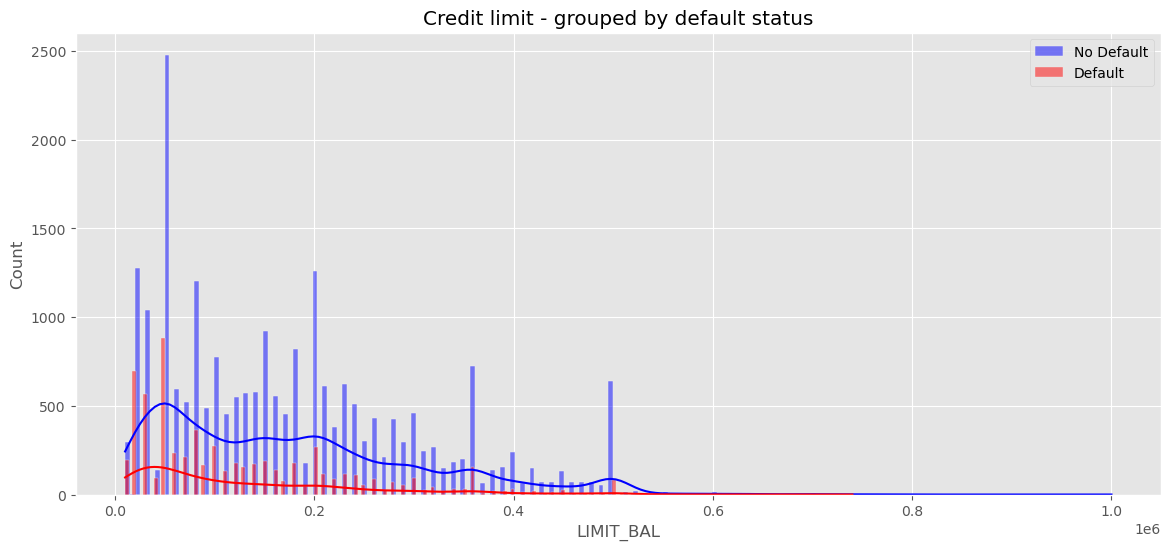

In [7]:

no_default = data_df.loc[data_df['default.payment.next.month'] == 0]["LIMIT_BAL"]
default = data_df.loc[data_df['default.payment.next.month'] == 1]["LIMIT_BAL"]

# Plotting
plt.figure(figsize=(14, 6))
plt.title('Credit limit - grouped by default status')
sns.histplot(no_default, kde=True, bins=200, color="blue", label='No Default')
sns.histplot(default, kde=True, bins=200, color="red", label='Default')
plt.legend()
plt.show()


We see from the data that individuals had an average credit of 167484 NDP (~4735 EUR), most individuals are females, highly educated and maried with an average age of about 35 years.

From the outcome variable, we see that around 22% of our sample defaulted in september.

Moreover, from the plot we see that many causes of default are concentrated in individuals with low credit limits.

But it is important to understand better how different is the population defaulting, for this we show the summary statistics only for this sub-population.


In [8]:

defaulting_df = data_df[data_df['default.payment.next.month'] == 1]

defaulting_df.describe()



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,6636.00,6636.00,6636.00,6636.00,6636.00,6636.00,6636.00,6636.00,6636.00,6636.00,...,6636.00,6636.00,6636.00,6636.00,6636.00,6636.00,6636.00,6636.00,6636.00,6636.00
mean,14773.78,130109.66,1.57,1.89,1.53,35.73,0.67,0.46,0.36,0.25,...,42036.95,39540.19,38271.44,3397.04,3388.65,3367.35,3155.63,3219.14,3441.48,1.00
std,8571.62,115378.54,0.50,0.73,0.53,9.69,1.38,1.50,1.50,1.51,...,64351.08,61424.70,59579.67,9544.25,11737.99,12959.62,11191.97,11944.73,13464.01,0.00
min,1.00,10000.00,1.00,1.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,...,-65167.00,-53007.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,7408.50,50000.00,1.00,1.00,1.00,28.00,0.00,0.00,-1.00,-1.00,...,2141.50,1502.75,1150.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,14758.50,90000.00,2.00,2.00,2.00,34.00,1.00,0.00,0.00,0.00,...,19119.50,18478.50,18028.50,1636.00,1533.50,1222.00,1000.00,1000.00,1000.00,1.00
75%,21831.75,200000.00,2.00,2.00,2.00,42.00,2.00,2.00,2.00,2.00,...,50175.75,47853.00,47424.00,3478.25,3309.75,3000.00,2939.25,3000.00,2974.50,1.00
max,30000.00,740000.00,2.00,6.00,3.00,75.00,8.00,7.00,8.00,8.00,...,548020.00,547880.00,514975.00,300000.00,358689.00,508229.00,432130.00,332000.00,345293.00,1.00



## First glance at probability of default using logistic regression

As a quick first assessment, we propose a logit regression to understand the variables that can increase the likelihood of default:



In [9]:

#Modify variables to improve interpretation:
data_df['female'] = (data_df['SEX'] == 2).astype(int)
data_df['married'] = (data_df['MARRIAGE'] == 1).astype(int)

# Define the independent variables and the dependent variable
independent_vars = ['LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'female', 'married']
X = data_df[independent_vars]
y = data_df['default.payment.next.month']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

#Save fitted values
data_df['y_fitted'] = result.predict(X)

# Summary of the logistic regression
logit_summary = result.summary2().tables[1]

# Result in odds ratios by taking the exponential the coefficients
odds_ratios = np.exp(result.params)
odds_ratios_df = pd.DataFrame({
    'Odds Ratio': odds_ratios,
    'p-value': result.pvalues
})


print(logit_summary)
print(odds_ratios_df)



Optimization terminated successfully.
         Current function value: 0.464536
         Iterations 7
           Coef.  Std.Err.      z  P>|z|  [0.025  0.975]
const      -1.08      0.07 -14.83   0.00   -1.23   -0.94
LIMIT_BAL  -0.00      0.00  -5.05   0.00   -0.00   -0.00
EDUCATION  -0.10      0.02  -4.94   0.00   -0.14   -0.06
AGE         0.01      0.00   3.52   0.00    0.00    0.01
PAY_0       0.58      0.02  32.73   0.00    0.54    0.61
PAY_2       0.09      0.02   4.32   0.00    0.05    0.13
PAY_3       0.07      0.02   3.28   0.00    0.03    0.12
PAY_4       0.05      0.02   2.53   0.01    0.01    0.09
BILL_AMT1  -0.00      0.00  -4.87   0.00   -0.00   -0.00
BILL_AMT2   0.00      0.00   1.54   0.12   -0.00    0.00
BILL_AMT3   0.00      0.00   0.98   0.33   -0.00    0.00
BILL_AMT4  -0.00      0.00  -0.11   0.92   -0.00    0.00
BILL_AMT5   0.00      0.00   0.51   0.61   -0.00    0.00
BILL_AMT6   0.00      0.00   0.37   0.71   -0.00    0.00
PAY_AMT1   -0.00      0.00  -5.90   0.00   


From the odd`s ratios, we see that the only variables that decrease the likelihood of default are a higher level of education and being a woman. While being maried, being older, or the amount of payments in september, increase the odds of defaulting.

Still, as limit_bal, bill_amt_t, pay_amt_t are floats with a high variation, it is harder to interpret. For this we propose to standardize with a normal those values. Besides, by standardizing it is easy to see how much one standard deviation change in the variable (i.e. from the average 0 to 1.0 in the Z-score scale) would impact the likelihood of defaulting.

It is is clear that PAY_0 of september will be highly linked with the default status in september. Assuming we are in one month prior (without the information of PAY_0, BILL_AMT1, and PAY_AMT1 in september) we will run the same regression without this information.

Finally, to avoid overfitting, we will use 70% of our dataset as training set, and 30% as test set.





In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assume data_df is your DataFrame containing the data

variables_to_standardize = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

data_df_standard = data_df.copy()

# Standardize the variables
for var in variables_to_standardize:
    data_df_standard[var] = (data_df[var] - data_df[var].mean()) / data_df[var].std()

# Split the dataset into training (70%) and test (30%) sets using a seed for replications
df_train, df_test = train_test_split(data_df_standard, test_size=0.3, random_state=42)

independent_vars = ['LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_2', 'PAY_3', 'PAY_4', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'female', 'married']
X_train = df_train[independent_vars]
y_train = df_train['default.payment.next.month']

# Add a constant to the independent variables
X_train = sm.add_constant(X_train)

# Fit the logistic regression model
start_time = time.time()
logit_model_train = sm.Logit(y_train, X_train)
result_train = logit_model_train.fit()
end_time = time.time()

# Calculate odds ratios
odds_ratios = np.exp(result_train.params)
odds_ratios_df = pd.DataFrame({
    'Odds Ratio': odds_ratios,
    'p-value': result_train.pvalues
})

print(result_train.summary())
print(odds_ratios_df)

# Create variable for whole data set
X_all = data_df_standard[independent_vars]
X_all = sm.add_constant(X_all)

# Predict using the fitted model
data_df_standard['y_fitted'] = result_train.predict(X_all)

# Create variable for test data set
X_test = df_test[independent_vars]
X_test = sm.add_constant(X_test)

# Predict using the fitted model
X_test['y_fitted'] = result_train.predict(X_test)


# Describe the DataFrames
data_df_standard.describe()
print(f"Execution time: {end_time - start_time:.2f} seconds")


Optimization terminated successfully.
         Current function value: 0.483569
         Iterations 8
                               Logit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                21000
Model:                                  Logit   Df Residuals:                    20981
Method:                                   MLE   Df Model:                           18
Date:                        Mon, 03 Jun 2024   Pseudo R-squ.:                 0.08806
Time:                                21:54:49   Log-Likelihood:                -10155.
converged:                               True   LL-Null:                       -11136.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4091      0.082    -17.196 

In [11]:
df_train.describe()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,female,married,y_fitted
count,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,...,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00
mean,15015.69,-0.00,1.61,1.85,1.55,35.50,-0.02,-0.13,-0.17,-0.22,...,-0.00,0.00,-0.00,0.00,0.00,0.00,0.22,0.61,0.46,0.22
std,8668.48,1.00,0.49,0.79,0.52,9.23,1.13,1.20,1.19,1.17,...,1.02,1.09,1.03,1.03,1.04,1.00,0.42,0.49,0.50,0.15
min,1.00,-1.21,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,...,-0.34,-0.26,-0.30,-0.31,-0.31,-0.29,0.00,0.00,0.00,0.00
25%,7459.75,-0.91,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,...,-0.28,-0.22,-0.27,-0.29,-0.30,-0.29,0.00,0.00,0.00,0.12
50%,15084.50,-0.21,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,...,-0.22,-0.17,-0.19,-0.21,-0.22,-0.21,0.00,1.00,0.00,0.19
75%,22506.50,0.56,2.00,2.00,2.00,42.00,0.00,0.00,0.00,0.00,...,-0.04,-0.04,-0.04,-0.05,-0.05,-0.07,0.00,1.00,1.00,0.26
max,29999.00,6.42,2.00,6.00,3.00,75.00,8.00,8.00,8.00,8.00,...,52.40,72.84,50.59,39.33,27.60,29.36,1.00,1.00,1.00,0.99


In [12]:
df_test.describe()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,female,married,y_fitted
count,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,...,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00
mean,14965.05,0.01,1.60,1.85,1.56,35.45,-0.02,-0.14,-0.16,-0.22,...,0.00,-0.01,0.00,-0.01,-0.01,-0.00,0.22,0.60,0.45,0.22
std,8641.88,1.01,0.49,0.79,0.52,9.20,1.11,1.19,1.20,1.17,...,0.96,0.75,0.91,0.93,0.91,1.01,0.41,0.49,0.50,0.15
min,4.00,-1.21,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,...,-0.34,-0.26,-0.30,-0.31,-0.31,-0.29,0.00,0.00,0.00,0.00
25%,7571.75,-0.91,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,...,-0.28,-0.22,-0.27,-0.29,-0.30,-0.29,0.00,0.00,0.00,0.12
50%,14847.00,-0.21,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,...,-0.21,-0.17,-0.19,-0.21,-0.22,-0.21,0.00,1.00,0.00,0.19
75%,22490.50,0.56,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,...,-0.04,-0.04,-0.04,-0.05,-0.05,-0.06,0.00,1.00,1.00,0.26
max,30000.00,4.87,2.00,6.00,3.00,79.00,8.00,7.00,8.00,7.00,...,25.25,16.45,19.26,33.45,21.42,29.44,1.00,1.00,1.00,0.99



We see that the it is now easier to interpret variables, since the payment/credit variables are now scaled.

A higher credit (limit_bal) and previous payment (pay_amt) are associated with smaller odds of defaulting. The size of the credit card bill (bill_amt) is less useful to determine if a person will default, with only the previous bill_amt2 (of the month of august) having an odds ratio significantly different than 1. In this case, individuals with higher bill sizes in august were less likely to default in september. This might be linked to non-defaulting individuals experiencing no credit constraint one month prior.

We can estimate the fitted values and determine a cutoff point of our estimation to determine if an observation is probably a default. We need to be careful regarding false positives and false negatives.

We will evaluate accuracy (total predictions over total instances), precision (true positives over true & false positives), recall/sensitivity (true positives over true positives and false negatives), specificity (true negatives over true negatives & false positives), F1 score, area under the Receiver Operating Characteristic curve, and .

Accuracy is usually used when the distributions are very balanced between positive and negative observations of the target variable. Since as it is often the case in fraud and default cases, positive observations are less common than negative ones, and a model maximizing accuracy may lead (proportionally) to many false negatives, when the usefulness of the model usually lies on finding possible cases of default or fraud.

Precision focus on the proportion of true positives face to true and false positives. It is useful when the cost of false positives is high. For example, in spam detection, a false positive means a legitimate email is marked as spam, which could be problematic.

The recall (or sensitivity) shows how well model predicts true positives regarding all actually positive observations (i.e. true positives + false negatives). Inverserly to the precision case, it is useful when the cost of false negative is high (e.g. medical diagnosis).

Specificity is similar to recall/sensitivity but for the true negative results (ration of when model predicts true negatives over all actually negative observations).

The F1 Score is a measure of balance between precision and recalled, is given by an harmonic mean: $F1 = 2 . \frac{Precision \times Recall}{Precision+Recall}$ . Can be very useful for imbalanced datasets.

The Receiver Operating Characteristic (ROC) curve plots the true positive rate (recall/sensitivity) against the false positive rate (1-Specificity). The area under its curve (AUC) is a very popular measure to evaluate the performance of prediction, since it balances both true and false positives. We will use it in our optimization process to choose the best possible cutoff point.



In [13]:

data_df_standard.describe()

#We will now use its fitted values to estimate the cutoff point to maximize the area under the curve.




,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,female,married,y_fitted
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,...,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,15000.50,-0.00,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,...,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.22,0.60,0.46,0.22
std,8660.40,1.00,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,...,1.00,1.00,1.00,1.00,1.00,1.00,0.42,0.49,0.50,0.13
min,1.00,-1.21,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,...,-0.34,-0.26,-0.30,-0.31,-0.31,-0.29,0.00,0.00,0.00,0.00
25%,7500.75,-0.91,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,...,-0.28,-0.22,-0.27,-0.29,-0.30,-0.29,0.00,0.00,0.00,0.13
50%,15000.50,-0.21,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,...,-0.22,-0.17,-0.19,-0.21,-0.22,-0.21,0.00,1.00,0.00,0.20
75%,22500.25,0.56,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,...,-0.04,-0.04,-0.04,-0.05,-0.05,-0.07,0.00,1.00,1.00,0.26
max,30000.00,6.42,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,...,52.40,72.84,50.59,39.33,27.60,29.44,1.00,1.00,1.00,0.96


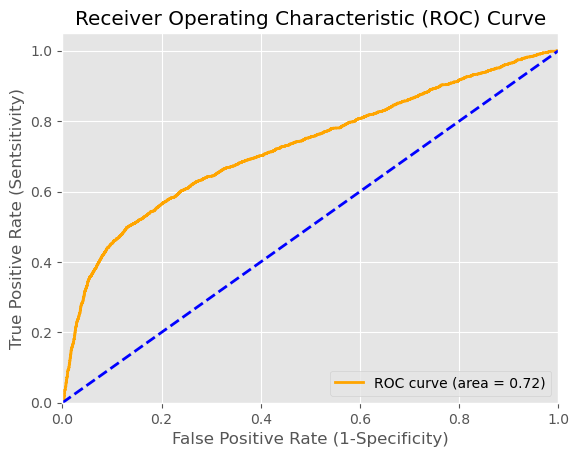

The optimal threshold of the model is: 0.28
The optimal area under the curve of the model is: 0.72
The precision of the model is: 0.51
The accuracy of the model is: 0.79
The recall of the model is: 0.50
The F1 score of the model is: 0.62


,default_prediction,y_fitted
count,9000.00,9000.00
mean,0.21,0.22
std,0.41,0.15
min,0.00,0.00
20%,0.00,0.10
40%,0.00,0.17
50%,0.00,0.19
60%,0.00,0.22
80%,1.00,0.29
90%,1.00,0.45


In [26]:
###NOW WE TEST USING ONLY OUT OF THE SAMPLE DATA (i.e. TEST DATA)

#Load scikit learn functions to evaluate precision of the model
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_score, accuracy_score, recall_score

# Compute ROC curve and area under the curve
# The Receiver Operating Characteristic (ROC) is a curve accounting for sensitive and 1-specificity 
#Here fpr is the false positive rate (i.e. the rate of attributing default to individuals paying on time)
#Here tpr is the true positive rate or recall (true positive/(true positive+false negative))
fpr, tpr, thresholds = roc_curve(df_test['default.payment.next.month'], df_test['y_fitted'])
roc_auc = roc_auc_score(df_test['default.payment.next.month'], df_test['y_fitted'])

# Find the optimal cutoff threshold that maximizes the area under the curve
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]


#Plot ROC
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--') #45 degree line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sentsitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



# Define y_cutoff based on the optimal threshold
df_test['default_predicted'] = (df_test['y_fitted'] >= optimal_threshold).astype(int)

print("The optimal threshold of the model is: {:.2f}".format(optimal_threshold))
print("The optimal area under the curve of the model is: {:.2f}".format(roc_auc))


precision = precision_score(df_test['default.payment.next.month'], df_test['default_predicted'])
accuracy = accuracy_score(df_test['default.payment.next.month'], df_test['default_predicted'])
recall = recall_score(df_test['default.payment.next.month'], df_test['default_predicted'])
F1 = 2*(accuracy*precision)/(accuracy+precision)


print("The precision of the model is: {:.2f}".format(precision))
print("The accuracy of the model is: {:.2f}".format(accuracy))
print("The recall of the model is: {:.2f}".format(recall))
print("The F1 score of the model is: {:.2f}".format(F1))


## The out of the sample prediction has an out-of-the-sample AUC of above 70%

# We can also see the average percentage of individuals actually predicted to default:
df_test['default_prediction'] = (df_test['y_fitted'] > optimal_threshold).astype(int)
df_test[['default_prediction', 'y_fitted']].describe(percentiles=[ 0.2,0.4, 0.50, 0.6,0.8,0.9,0.95,0.99 ])





## Other predictive models 

### Random forest

The idea behind random forest is to collect multiple decision trees with random points of depart in order to make predictions. Decision trees split data into different subsets, which can help to then determine subsets with higher likelihood of having a positive target variable (in this case, defaulting). The randomness from the Bootstrap Aggregation (or bagging/row variation) ensures that trees are diverse, decreasing the chance of over-fitting. Pratically, for each random decision tree, we can evaluate it with random splits of train and test data sets, and finally combining the results. Moreover, (since our data set can be too specific) we can also randomly restrict our subspaces of available features (e.g. for some the feature 'gender' or 'eudcation' might not be available), introducing column variation. 

Random forest are harder to interpret and can be computationally intensive to estimate. Nonetheless, we can still estimate feature importance, which shows how deterministic features were to make an accurate decision. This is estimated by first estimating the accuracy on the training set for the $i_{th}$ feature, then permuting the values of this feature and measuring new accuracy. In case the feature is really important, permutation would drastically decrease the accuracy.





In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import randint

#We will use the same samples from the logistic case
X_train = df_train[independent_vars]
y_train = df_train['default.payment.next.month']
X_test = df_test[independent_vars]
y_test = df_test['default.payment.next.month']

#We start with a set of possible hyperparameters to be optimized using randomized search

param_dist = {
    'n_estimators': randint(100, 1000), #number of trees in the forest #randint takes
    'max_depth': randint(10, 100), #determines the maximum depth of the three
    'min_samples_leaf': randint(1, 10), #the minimum number of samples required to be at a leaf node (final node)
    'max_features': ['auto', 'sqrt', 'log2'] #number of features to consider when looking for the best split
}

#Start the Random Forest model with seed for reproduction
rf_model = RandomForestClassifier(random_state=42)

#RandomizedSearchCV, using 3 iterations with 2 cross validating folds to find best hyperparameter setting
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=3, cv=2, verbose=2, random_state=42, n_jobs=-1)

#Fit RandomizedSearchCV
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

#Train the Random Forest model with the best parameters
best_rf_model = random_search.best_estimator_
best_rf_model.fit(X_train, y_train)

#Predict using the fitted model
df_train['y_fitted'] = best_rf_model.predict(X_train)
df_test['y_fitted'] = best_rf_model.predict(X_test)

#Evaluate the model
train_report = classification_report(y_train, df_train['y_fitted'])
test_report = classification_report(y_test, df_test['y_fitted'])

print("Training Classification Report:\n", train_report)
print("Test Classification Report:\n", test_report)
print(f"Execution time: {end_time - start_time:.2f} seconds")


Fitting 2 folds for each of 3 candidates, totalling 6 fits
Training Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91     16324
           1       0.83      0.40      0.54      4676

    accuracy                           0.85     21000
   macro avg       0.84      0.69      0.72     21000
weighted avg       0.85      0.85      0.83     21000

Test Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      7040
           1       0.59      0.28      0.38      1960

    accuracy                           0.80      9000
   macro avg       0.71      0.61      0.63      9000
weighted avg       0.77      0.80      0.77      9000



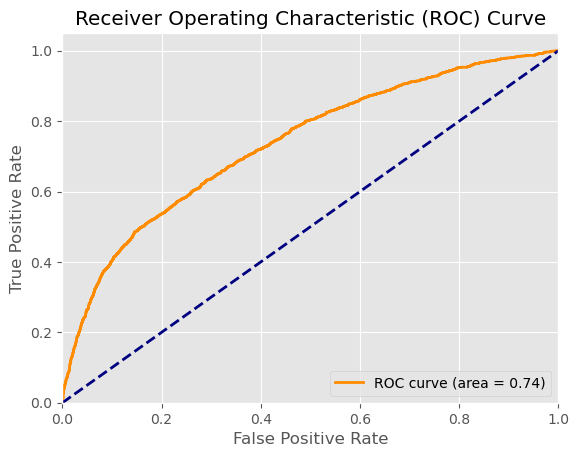

Area Under the Curve (AUC): 0.74


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
#We repeat the performance results, but now for the random forest
y_test_proba = best_rf_model.predict_proba(X_test)[:, 1]

#Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

#Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC
print(f'Area Under the Curve (AUC): {roc_auc:.2f}')
print(f"Execution time: {end_time - start_time:.2f} seconds")


### Support vector machine (SVM)

SVMs aim to separate positive and negative observations of our target variable so well as possible through the proposition of hyperplanes (or planes/lines in lower dimensions) to separate our data as a decision boundary with an equally sized margin to the sides of the hyper plane. This is done with the help of support vectors, created through data points close to the boundaries of the separating hyperplane margin. SVM's margins aim to be as wide as possible to guarantee a better distinction between positive and negative observations.

One danger is the existence of outliers, that can overfit the data and make margins unecessarily narrow with a decision boundary too close to both 'regions'. 

Wrong predictions with a high distance from the decision boundary are highly penalized, while wrong predictions close to the boundary are less penalized. This is done through a hinge loss function.

Since the sepration between positive and negative observation might not be linear, it is possible to improve the performance of the decision boundary classification of SVMs by making a non linear transformation of our features (independent variables). This can be achieved by kernels (e.g. polynomial, radial basis function...).

In most data cases, we only have 'soft margins', since some observations may lie inside our estimated margin.

Contrary to the logistic regression case, SVMs do not provide probability estimates for our observation, but instead a decision based on the distance from the boundary.



Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best parameters found: {'C': 9.544966028573068, 'kernel': 'rbf'}


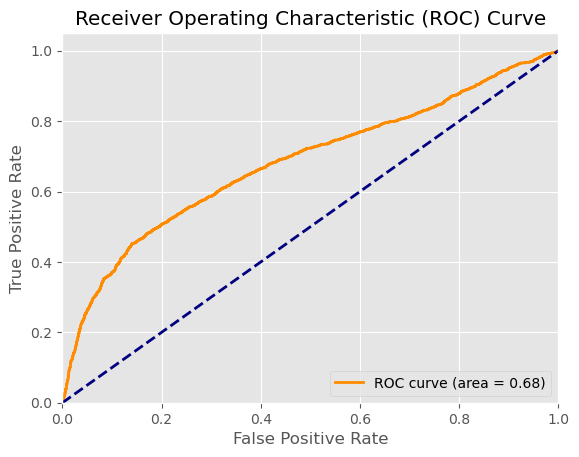

Area Under the Curve (AUC): 0.68
Execution time: 318.64 seconds


In [34]:
#The approach is very similar to the random forest case, since we also need to select the hyperparameters 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from scipy.stats import randint, uniform


#We will use the same samples from the logistic case
X_train = df_train[independent_vars]
y_train = df_train['default.payment.next.month']
X_test = df_test[independent_vars]
y_test = df_test['default.payment.next.month']


#Define the hyperparameter grid - Best parameters found: {'C': 3.845401188473625, 'gamma': 'scale', 'kernel': 'poly'}
param_dist = {
    'C': uniform(0.1, 10.0), # Is the regularization parameter (strength of the regularization is inversely proportional to C)
    'kernel': ['rbf'] #we will restrict to rbf, but could also be 'poly', linear, or others
}

#Initialize the SVM model with seed
svm_model = SVC(probability=True, random_state=42)

#Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(svm_model, param_distributions=param_dist, n_iter=2, cv=2, verbose=3, random_state=37, n_jobs=-1) #verbose is the detail of the output (higher more detail)

# Fit RandomizedSearchCV
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

# Print the best parameters
print(f"Best parameters found: {random_search.best_params_}")

# Train the SVM model with the best parameters
best_svm_model = random_search.best_estimator_
best_svm_model.fit(X_train, y_train)

# Predict probabilities using the fitted model
y_test_proba = best_svm_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC
print(f'Area Under the Curve (AUC): {roc_auc:.2f}')
print(f"Execution time: {end_time - start_time:.2f} seconds")


### Gradient Boosting with XGBoost

It is an ensemble learning technique (as the case of random forest) that combines the predictions of multiple weak learners (typically decision trees) to create a strong learner. It works by building new models (or trees) sequentially, where each new model tries to correct the errors of the previous trees.

1. **Initialization:** Start with an initial prediction (e.g. the mean of the target values for regression).
2. **Fit Weak Learner:** Fit a weak learner (e.g. a small decision tree) to the residuals of the current model.
3. **Update Model:** Add the predictions of the new weak learner to the existing model to update the predictions.
4. **Repeat:** Continue adding weak learners until the desired number of iterations is reached or the performance improvement is negligible.

**XGBoost** (or Extreme Gradient Boosting) in particular is a popular algorithm implementation of the gradient boosting framework with very good performance and speed (when compared to other similar ensemble methods). It integrates L1 (in absolute value, like LASSO, good for feature selection) and L2 (squared, good to reduce weights of features) regularization components



Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters found: {'gamma': 0.35351712384334233, 'learning_rate': 0.182799754606763, 'max_depth': 2, 'n_estimators': 114, 'reg_alpha': 0.08263346953150125, 'reg_lambda': 0.5156364067411939, 'subsample': 0.7117007403531848}


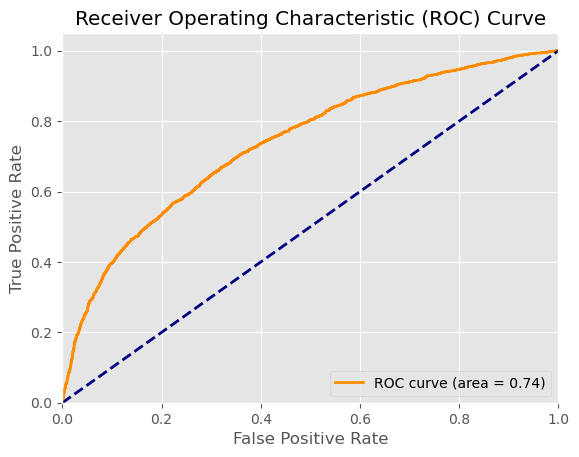

Area Under the Curve (AUC): 0.74
Execution time: 38.42 seconds


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from scipy.stats import uniform, randint

#We will use the same samples from the logistic case
X_train = df_train[independent_vars]
y_train = df_train['default.payment.next.month']
X_test = df_test[independent_vars]
y_test = df_test['default.payment.next.month']


param_dist = {
    'n_estimators': randint(100, 1000), #number of gbtrees or boosting rounds
    'max_depth': randint(2, 5), #depth of tree
    'learning_rate': uniform(0.1, 0.3), #learning rate in each new weak model added
    'subsample': uniform(0.5, 0.5), #subsample ratio of the training instances
    'gamma': uniform(0.05, 0.5), #minimum loss reduction required to make a further partition on a leaf node of the tree
    'reg_alpha': uniform(0.0, 0.5), #L1 regulariz (similar to LASSO)
    'reg_lambda': uniform(0.5, 1) #L2 regulariz (similar to Ridge)
}

#Start the XGBoost model with gbtree (also possible to use linear xb or dropout meet multiple reg tree)
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

#RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=15, cv=5, verbose=2, random_state=42, n_jobs=-1)

#Fit RandomizedSearchCV
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

#Print the best parameters
print(f"Best parameters found: {random_search.best_params_}")

#Train the XGBoost model with the best parameters
best_xgb_model = random_search.best_estimator_
best_xgb_model.fit(X_train, y_train)

#Predict probabilities using the fitted model
y_test_proba = best_xgb_model.predict_proba(X_test)[:, 1]

#Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

#Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#Print AUC
print(f'Area Under the Curve (AUC): {roc_auc:.2f}')
print(f"Execution time: {end_time - start_time:.2f} seconds")




### Summary of results

In summary, XGBoost and Random Forest had better predictions (AUC=0.74), but the simple and fastest Logit model had a good AUC (0.72) with the advantages of interpretability and probability estimation of a parametric model. SVM and Random Forest were the slowest to compute, with XGBoost being the second faster.

**Future updates:** More detailed EDA, better explanation of models, feature importance estimation, include regularization in logistic regression

